<a href="https://colab.research.google.com/github/fnavab/APS360-project/blob/main/Project_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Imports

In [ ]:
import torch
from torch import Tensor
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Class Initializations

In [ ]:
class CNN_ALEX(nn.Module):
    def __init__(self):
        super(CNN_ALEX, self).__init__()
        self.name="CNN_ALEX"
        self.fc1 = nn.Linear(256 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 8)

    def forward(self, x):
        x = x.view(x.shape[0], 256 * 8 * 8) #flatten feature data
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1)
        return x

In [ ]:
class ImageFolderWithPaths(datasets.ImageFolder): # CREDIT: https://gist.github.com/andrewjong/6b02ff237533b3b2c554701fb53d5c4d
    """Custom dataset that includes image file paths. Extends
    torchvision.datasets.ImageFolder
    """

    # override the __getitem__ method. this is the method that dataloader calls
    def __getitem__(self, index):
        # this is what ImageFolder normally returns 
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        # the image file path
        path = self.imgs[index][0]
        # make a new tuple that includes original and the path
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path

# Data Processing Code

In [ ]:
# Import bounding boxes to dictionary

d = {}
with open("/content/gdrive/My Drive/Colab Notebooks/Project/list_bbox.txt") as f:
  for i, line in enumerate(f):
    if i != 0 and i != 1: # ignore first two lines
      (key, x1, y1, x2, y2) = line.split()
      d[key] = (int(x1), int(y1), int(x2), int(y2))

# filenames have varying prefix lengths depending on label
label_lengths = {}
label_lengths[0] = len("0_Shirt")
label_lengths[1] = len("1_Jeans")
label_lengths[2] = len("2_Lounge pants")
label_lengths[3] = len("3_Shorts")
label_lengths[4] = len("4_Skirt")
label_lengths[5] = len("5_Sweater")
label_lengths[6] = len("6_Dress")
label_lengths[7] = len("7_Jacket")

def process_img(img, label, filename, max_h=299, max_w=299, plot=False):
  
  original_fname = filename

  if plot: print("Original shape:", img.shape)
  img = img.permute(1, 2, 0) # rearrange tensor so colour channel is at the end

  # in bbox file, filenames are formatted like this: img/Sheer_Pleated-Front_Blouse/img_00000001.jpg
  label_length = label_lengths[label]
  filename = "img" + filename[73+label_length:] # get rid of google drive prefix

  img_name = filename
  if img_name in d:
    x1, y1, x2, y2 = d[img_name] # get bbox values
  else:
    return (0,0,0)

  img_cropped = img[y1:y2, x1:x2, :3] # crop based on bbox values

  if plot: print("Cropped shape:", img_cropped.shape)

  # create background image for uniformly-sized images
  bg = torch.zeros((max_h,max_w,3))

  # superimpose cropped image on background
  for z in range(img_cropped.shape[2]):
    for y in range(img_cropped.shape[1]):
      for x in range(img_cropped.shape[0]):
        bg[x][y][z] = img_cropped[x][y][z]

  # plot original and bounded side by side
  if plot:
    f = plt.figure()
    f.add_subplot(1,4, 1)
    plt.imshow(img)
    f.add_subplot(1,4, 2)
    plt.imshow(img_cropped)
    f.add_subplot(1,4, 3)
    plt.imshow(bg)
    plt.show(block=True)

  return (img, bg, original_fname)

# Select Demo Examples

In [ ]:
def get_examples(idx_0, idx_1, idx_2, idx_3, idx_4, idx_5, idx_6, idx_7):
  transform = transforms.Compose([transforms.ToTensor()])

  shirts = ImageFolderWithPaths("/content/gdrive/My Drive/Colab Notebooks/Project/APS360 GROUP/Image_data/0_Shirt/", transform=transform)
  jeans = ImageFolderWithPaths("/content/gdrive/My Drive/Colab Notebooks/Project/APS360 GROUP/Image_data/1_Jeans/", transform=transform)
  loungepants = ImageFolderWithPaths("/content/gdrive/My Drive/Colab Notebooks/Project/APS360 GROUP/Image_data/2_Lounge pants/", transform=transform)
  shorts = ImageFolderWithPaths("/content/gdrive/My Drive/Colab Notebooks/Project/APS360 GROUP/Image_data/3_Shorts/", transform=transform)
  skirt = ImageFolderWithPaths("/content/gdrive/My Drive/Colab Notebooks/Project/APS360 GROUP/Image_data/4_Skirt/", transform=transform)
  sweater = ImageFolderWithPaths("/content/gdrive/My Drive/Colab Notebooks/Project/APS360 GROUP/Image_data/5_Sweater/", transform=transform)
  dress = ImageFolderWithPaths("/content/gdrive/My Drive/Colab Notebooks/Project/APS360 GROUP/Image_data/6_Dress/", transform=transform)
  jacket = ImageFolderWithPaths("/content/gdrive/My Drive/Colab Notebooks/Project/APS360 GROUP/Image_data/7_Jacket/", transform=transform)

  examples = [shirts[idx_0], jeans[idx_1], loungepants[idx_2], shorts[idx_3], skirt[idx_4], sweater[idx_5], dress[idx_6], jacket[idx_7]]

  return examples

In [ ]:
demo_data = get_examples(2684, 2309, 2602, 2659, 2072, 1004, 1009, 1004)

Original shape: torch.Size([3, 300, 196])
Cropped shape: torch.Size([226, 115, 3])


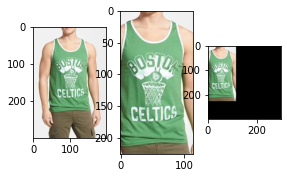

Original shape: torch.Size([3, 300, 193])
Cropped shape: torch.Size([142, 94, 3])


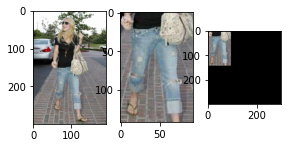

Original shape: torch.Size([3, 300, 221])
Cropped shape: torch.Size([299, 158, 3])


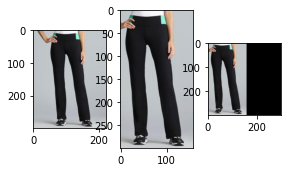

Original shape: torch.Size([3, 200, 200])
Cropped shape: torch.Size([49, 199, 3])


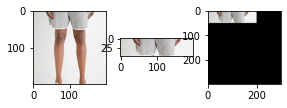

Original shape: torch.Size([3, 300, 225])
Cropped shape: torch.Size([73, 82, 3])


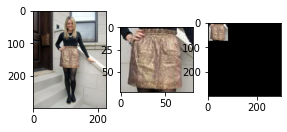

Original shape: torch.Size([3, 300, 300])
Cropped shape: torch.Size([299, 299, 3])


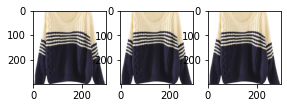

Original shape: torch.Size([3, 300, 300])
Cropped shape: torch.Size([209, 127, 3])


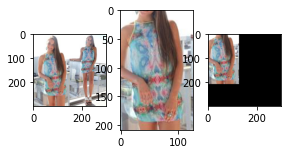

Original shape: torch.Size([3, 300, 240])
Cropped shape: torch.Size([243, 156, 3])


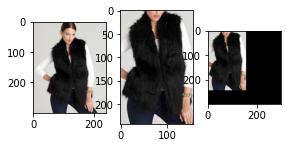

In [ ]:
original_demo_images = [] # uncropped for demo display
demo_images = [] # cropped for input to model
files = [] # keep track of filenames used for display purposes
for i, img in enumerate(demo_data):
  original_img, processed_img, fname = process_img(img[0], i, img[2], plot=True)
  original_demo_images.append(original_img)
  demo_images.append((processed_img, i))
  files.append(fname)

# Model Predictions

In [ ]:
import torchvision.models
import os

alexnet = torchvision.models.alexnet(pretrained=True)

use_cuda = True
final_model = CNN_ALEX()
final_model.load_state_dict(torch.load("/content/gdrive/My Drive/Colab Notebooks/Project/APS360 GROUP/Final-Model"))

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


<All keys matched successfully>

In [ ]:
# data loader
demo_loader = torch.utils.data.DataLoader(demo_images, batch_size=1)

demo_features = []
for image, label in demo_loader: # get features for demo images
  processed_img = image.permute(0,3,1,2)
  features = alexnet.features(processed_img)
  features_tensor = torch.from_numpy(features.detach().numpy())
  demo_features.append((features_tensor, label))

In [ ]:
def visualize_prediction(fname, label, bounding_boxes, prediction, probability):
  
  highlighted_item = cv2.imread(fname, cv2.IMREAD_COLOR)

  # in bbox file, filenames are formatted like this: img/Sheer_Pleated-Front_Blouse/img_00000001.jpg
  label_length = label_lengths[label]
  filename = "img" + fname[73+label_length:] # get rid of google drive prefix

  img_name = filename
  x1, y1, x2, y2 = d[img_name] # get bbox values

  cv2.rectangle(highlighted_item,(x1,y1),(x2,y2),(0,0,255), 3) # top-left, bottom-right

  if prediction == "Lounge Pants" or prediction == "Jeans" or prediction == "Skirt":
    fontScale = 0.4
  else:
    fontScale = 0.5
  font = cv2.FONT_HERSHEY_SIMPLEX
  position = (x1+10,y1+20)

  text = prediction + " " + str(round(probability*100, 2)) + "%" # i.e. Shirt 99.31%

  cv2.putText(highlighted_item, text, position, font, fontScale, (0,0,255), 1, cv2.LINE_AA)
  cv2_imshow(highlighted_item)

  return

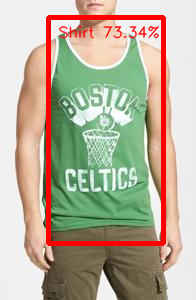

Shirt 73.34%




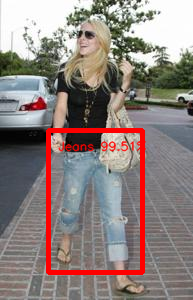

Jeans 99.51%




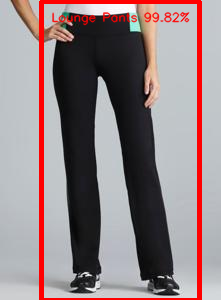

Lounge Pants 99.82%




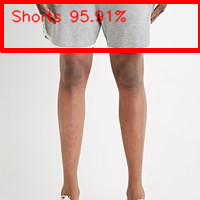

Shorts 95.91%




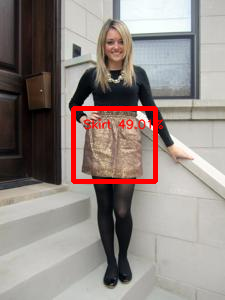

Skirt 49.01%




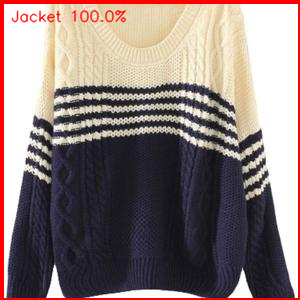

Jacket 100.0%




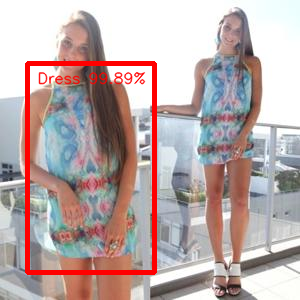

Dress 99.89%




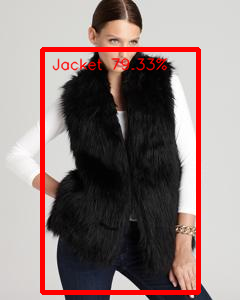

Jacket 79.33%




In [ ]:
classes = ["Shirt", "Jeans", "Lounge Pants", "Shorts", "Skirt", "Sweater", "Dress", "Jacket"] # classes for display

for i in range(8):
  image = demo_images[i]
  features = demo_features[i]
  fname = files[i]

  output = final_model(features[0]) # model output
  probabilities = torch.softmax(output, 1) # compute probabilities
  probabilities = probabilities.tolist()[0]

  prediction = np.argmax(probabilities) # get model prediction

  visualize_prediction(fname, i, d, classes[prediction], probabilities[prediction])
  print(classes[prediction] + " " + str(round(probabilities[prediction]*100, 2)) + "%")
  print('\n')